## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [1]:
name='Yulia_Sengleeva' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [39]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error


### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [4]:
df=pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')
df

,sales,month,day,year
0,134.710,10,31,2020
1,137.740,7,31,2020
2,134.620,4,30,2020
3,141.670,1,31,2020
4,127.990,10,31,2019
...,...,...,...,...
142,1.656,4,30,1985
143,2.074,1,31,1985
144,1.584,10,31,1984
145,1.508,7,31,1984


### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [5]:
df.isna().value_counts()

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

In [6]:
print(df.isna().sum().sum())

0


### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [7]:
print(df.dtypes)

sales    float64
month      int64
day        int64
year       int64
dtype: object


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [8]:
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')

Change index to dates:

``` df.index=.... ```

In [9]:
df.index=pd.to_datetime(df['date'])

What is the size of the dataset?

use ```.shape```

In [10]:
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [11]:
df=df.drop(['day', 'year','month', 'date'], axis=1)
df

,sales
date,
2020-10-31,134.710
2020-07-31,137.740
2020-04-30,134.620
2020-01-31,141.670
2019-10-31,127.990
...,...
1985-04-30,1.656
1985-01-31,2.074
1984-10-31,1.584


What is the size of the dataset now?

In [12]:
df.shape

(147, 1)

### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [13]:
y=df['sales']
y

date
2020-10-31    134.710
2020-07-31    137.740
2020-04-30    134.620
2020-01-31    141.670
2019-10-31    127.990
               ...   
1985-04-30      1.656
1985-01-31      2.074
1984-10-31      1.584
1984-07-31      1.508
1984-04-30      1.235
Name: sales, Length: 147, dtype: float64

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [14]:
y=np.flip(y)

Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

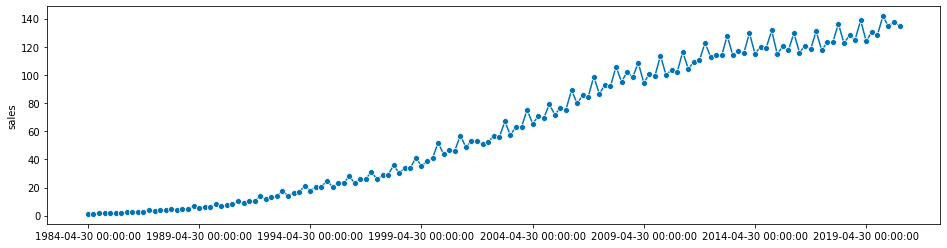

In [15]:
plot_series(y)

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [16]:
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

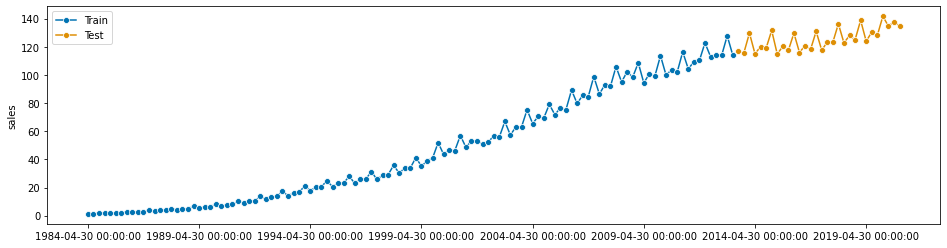

In [17]:
plot_series(y_train, y_test, labels=['Train', 'Test'])

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [18]:
model_MAA = ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA = model_MAA.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [28]:
model_AAM = ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)

fit_AAM=model_AAM.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [29]:
fit_MAA_fc=fit_MAA.forecast(steps=30)

2013-07-31    117.848871
2013-10-31    117.364671
2014-01-31    130.725437
2014-04-30    117.901780
2014-07-31    121.230477
2014-10-31    120.746278
2015-01-31    134.107043
2015-04-30    121.283387
2015-07-31    124.612084
2015-10-31    124.127884
2016-01-31    137.488650
2016-04-30    124.664993
2016-07-31    127.993690
2016-10-31    127.509491
2017-01-31    140.870256
2017-04-30    128.046600
2017-07-31    131.375297
2017-10-31    130.891098
2018-01-31    144.251863
2018-04-30    131.428207
2018-07-31    134.756904
2018-10-31    134.272704
2019-01-31    147.633470
2019-04-30    134.809813
2019-07-31    138.138510
2019-10-31    137.654311
2020-01-31    151.015076
2020-04-30    138.191420
2020-07-31    141.520117
2020-10-31    141.035918
Freq: Q-OCT, Name: simulation, dtype: float64

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [30]:
fit_AAM_fc=fit_AAM.forecast(steps=30)

2013-07-31    119.244343
2013-10-31    117.867016
2014-01-31    133.457267
2014-04-30    118.815273
2014-07-31    124.107174
2014-10-31    122.625169
2015-01-31    138.790952
2015-04-30    123.516809
2015-07-31    128.970004
2015-10-31    127.383322
2016-01-31    144.124636
2016-04-30    128.218344
2016-07-31    133.832835
2016-10-31    132.141475
2017-01-31    149.458321
2017-04-30    132.919879
2017-07-31    138.695666
2017-10-31    136.899628
2018-01-31    154.792005
2018-04-30    137.621415
2018-07-31    143.558497
2018-10-31    141.657781
2019-01-31    160.125690
2019-04-30    142.322950
2019-07-31    148.421327
2019-10-31    146.415934
2020-01-31    165.459374
2020-04-30    147.024485
2020-07-31    153.284158
2020-10-31    151.174087
Freq: Q-OCT, Name: simulation, dtype: float64

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

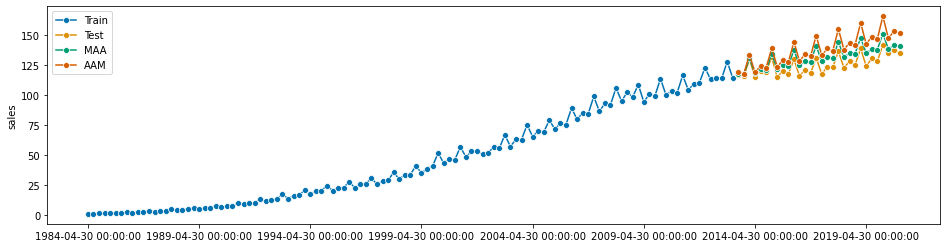

In [23]:
plot_series(y_train, y_test, fit_MAA_fc, fit_AAM_fc, labels=['Train','Test', 'MAA', 'AAM'])

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [32]:
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)
upper_int=pred_MAA["pi_upper"]
lower_int=pred_MAA["pi_lower"]
mean_pred=pred_MAA["mean"]

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

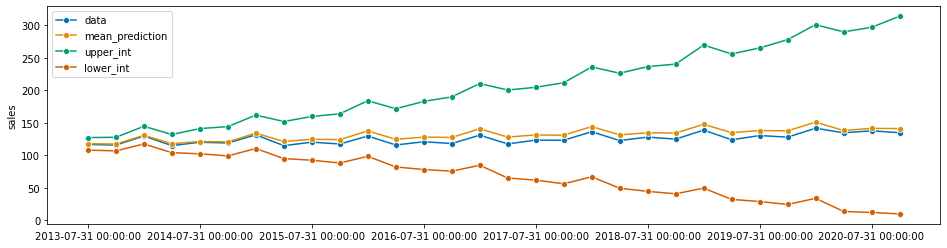

In [25]:
plot_series(y_test, mean_pred, upper_int, lower_int,labels=['data','mean_prediction', 'upper_int','lower_int'])

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [26]:
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
upper_int2=pred_AAM["pi_upper"]
lower_int2=pred_AAM["pi_lower"]
mean_pred2=pred_AAM["mean"]

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

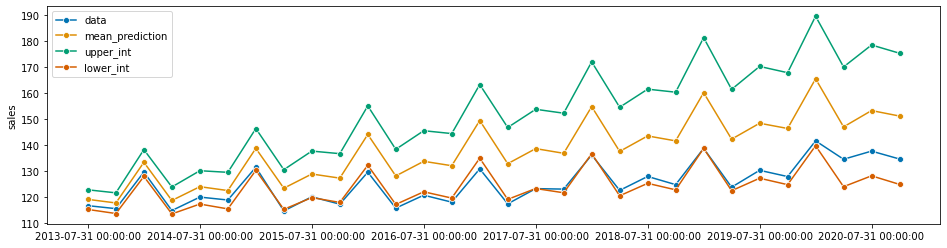

In [27]:
plot_series(y_test, mean_pred2, upper_int2, lower_int2,labels=['data','mean_prediction', 'upper_int','lower_int'])

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [54]:
MAE_MAA= mean_absolute_error(y_test, fit_MAA_fc)
MAE_MAA

6.394543362163331

In [44]:
MAE_AAM=mean_absolute_error(y_test, fit_AAM_fc)
MAE_AAM

12.708860450185579

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [47]:
MSE_MAA=mean_squared_error(y_test, fit_MAA_fc)
MSE_MAA

50.57142119587173

In [49]:
MSE_AAM=mean_squared_error(y_test, fit_AAM_fc)
MSE_AAM

195.96105229289387

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [51]:
MAPE_MAA=mean_absolute_percentage_error(y_test, fit_MAA_fc)
MAPE_MAA

5.0916984960705856

In [52]:
MAPE_AAM=mean_absolute_percentage_error(y_test, fit_AAM_fc)
MAPE_AAM

9.993287973590954

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [56]:
print('ETS MAA is better')

ETS MAA is better
